<a href="https://colab.research.google.com/github/mamchayd/-Projet_Web_et_Mobile_Cinema_JEE_Spring_Angular_frontEnd/blob/master/Multi-Layer%20Network%20from%20scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [66]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
  return x * (1 - x)
  


In [67]:
fonctSig = [sigmoid,sigmoid_derivative]

In [68]:
def ReLu(x):
    return x * (x > 0) 

def ReLU_derivative(x):
    return 1. * (x > 0)




In [72]:
relu_funcs = [ReLu, ReLU_derivative]

In [82]:

class MultiLayerNN:

      #constructeur
      def __init__(self,input,hiden,output):
          np.random.seed(0) #définit la valeur de départ aléatoire à 0
          self.inputHiden_weights=np.random.rand(input,hiden) # init de weights couche caché
          self.outputHiden_weights=np.random.rand(hiden,output)# init de weights couche sourtie

          self.hiden_bias = np.random.rand(1,hiden) # init de bais couche caché
          self.output_bias = np.random.rand(1,output) # init de bais couche sortie
          self.learning_rate=0.01
          


      #la methode fit l’apprentissage 
      def fit(self, X, y, epoch=200, learning_rate=0.01,activation_function= fonctSig):
          self.activation_function=activation_function[0]
          self.activation_function_derivative=activation_function[1]
          yy = y
          y = y.reshape(-1,1)
          m = (epoch/10)
          
          for i in range(epoch):
      #-------------------------Forward--------------------------------------------    
            #Hiden Layer
            #la somme pondérée des données entrant à la couche cachée

            hidden_layer_sum = np.dot(X, self.inputHiden_weights) + self.hiden_bias
            # Appliquer la fonction d'activation pour les données à la sortie de la couche cachée
            hidden_layer_out = self.activation_function(hidden_layer_sum)
            
            # Couche de sortie
            output_layer_sum = np.dot(hidden_layer_out, self.outputHiden_weights) + self.output_bias
            # Valeur prédite
            y_predicted = self.activation_function(output_layer_sum)
            
            #Backward pass
            dloss_dbias_out = (y_predicted - y) * self.activation_function_derivative(y_predicted)
            dloss_dw_out = hidden_layer_out.T.dot(dloss_dbias_out)
            
            dloss_dbias_h = (dloss_dbias_out).dot(self.outputHiden_weights.T) * self.activation_function_derivative(hidden_layer_out)
            dloss_dw_h = X.T.dot(dloss_dbias_h)

            #modifier
            self.inputHiden_weights -= dloss_dw_h * learning_rate
            self.hiden_bias -=np.sum(dloss_dbias_h,axis = 0, keepdims = True) * learning_rate
            self.outputHiden_weights-= dloss_dw_out * learning_rate
            self.output_bias-= np.sum(dloss_dbias_out, axis = 0, keepdims = True) * learning_rate
            if (i % m == 0) :
              print(" Iteration N° ({}) => Loss : {:.4f} --- Accuracy : {:.4f} ".format(i, np.mean((y_predicted - yy)**2), (yy == self.predict(X)).mean()))



# Une méthode predict pour la prédiction
      def predict(self, X):    
            # hiden layer
            inputHiden_sum = np.dot(X, self.inputHiden_weights) + self.hiden_bias
            output_hiden = self.activation_function(inputHiden_sum)
                
            # output layer
            output_sum = np.dot(output_hiden,self.outputHiden_weights) + self.output_bias
                
            # val predict
            y_predicted = self.activation_function(output_sum)
                
            return np.round(y_predicted).reshape(1,-1)[0]




In [83]:
#generer dataset
rng = np.random.RandomState(0)
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0),dtype=int)

In [77]:
X[0:100]

            
            

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502],
       [ 0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ],
       [ 0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567],
       [ 0.04575852, -0.18718385],
       [ 1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252],
       [-0.88778575, -1.98079647],
       [-0.34791215,  0.15634897],
       [ 1.23029068,  1.20237985],
       [-0.38732682, -0.30230275],
       [-1.04855297, -1.42001794],
       [-1.70627019,  1.9507754 ],
       [-0.50965218, -0.4380743 ],
       [-1.25279536,  0.77749036],
       [-1.61389785, -0.21274028],
       [-0.89546656,  0.3869025 ],
       [-0.51080514, -1.18063218],
       [-0.02818223,  0.42833187],
       [ 0.06651722,

In [49]:
y[0:100]

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0])

 Iteration N° (0) => Loss : 0.3897 --- Accuracy : 0.4733 
 Iteration N° (1000) => Loss : 0.3668 --- Accuracy : 0.9367 
 Iteration N° (2000) => Loss : 0.4017 --- Accuracy : 0.9767 
 Iteration N° (3000) => Loss : 0.4192 --- Accuracy : 0.9833 
 Iteration N° (4000) => Loss : 0.4283 --- Accuracy : 0.9833 
 Iteration N° (5000) => Loss : 0.4341 --- Accuracy : 0.9867 
 Iteration N° (6000) => Loss : 0.4384 --- Accuracy : 0.9867 
 Iteration N° (7000) => Loss : 0.4419 --- Accuracy : 0.9867 
 Iteration N° (8000) => Loss : 0.4449 --- Accuracy : 0.9900 
 Iteration N° (9000) => Loss : 0.4475 --- Accuracy : 0.9900 


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


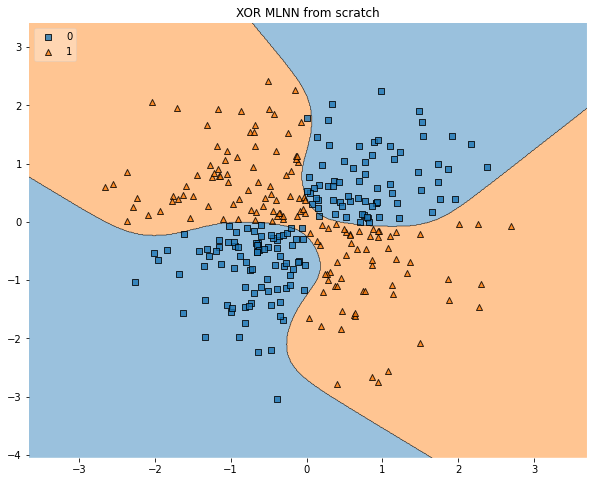

In [90]:
#crer le model ==> methode sigmoid
#le model
model = MultiLayerNN(2,6,1)
#apprentissage
model.fit(X, y, epoch=10000, learning_rate=0.01, activation_function=fonctSig)
fig = plt.figure(figsize=(10,8))
fig = plot_decision_regions(X=X, y=y, clf=model, legend=2)
plt.title("XOR MLNN from scratch")
plt.show()



 Iteration N° (0) => Loss : 7.1883 --- Accuracy : 0.3667 
 Iteration N° (1000) => Loss : 0.3324 --- Accuracy : 0.8467 
 Iteration N° (2000) => Loss : 0.3951 --- Accuracy : 0.8800 
 Iteration N° (3000) => Loss : 0.4107 --- Accuracy : 0.9100 
 Iteration N° (4000) => Loss : 0.4089 --- Accuracy : 0.9233 
 Iteration N° (5000) => Loss : 0.4075 --- Accuracy : 0.9367 
 Iteration N° (6000) => Loss : 0.4079 --- Accuracy : 0.9400 
 Iteration N° (7000) => Loss : 0.4092 --- Accuracy : 0.9400 
 Iteration N° (8000) => Loss : 0.4106 --- Accuracy : 0.9433 
 Iteration N° (9000) => Loss : 0.4108 --- Accuracy : 0.9433 


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


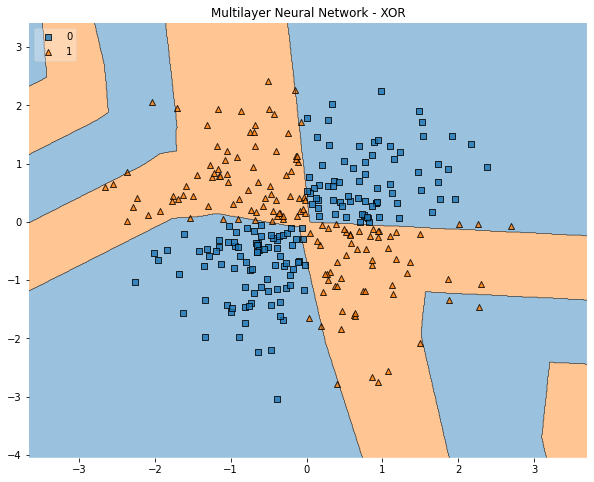

In [89]:

# Modèle
model = MultiLayerNN(2, 6, 1)

# Apprentissage
model.fit(X, y, epoch=10000, learning_rate=0.0001, activation_function = relu_funcs)

# Plotting
fig = plt.figure(figsize = (10, 8))
fig = plot_decision_regions(X = X, y = y, clf=model, legend=2)
plt.title("Multilayer Neural Network - XOR")
plt.show()